## Transfer Learning Inception V3 using Keras

## **Step-1: Importing Required Libraries**

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Step-2: Assigning Datasets path**

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'D/content/drive/MyDrive/Air_Pollution_Dataset/train'
valid_path = '/content/drive/MyDrive/Air_Pollution_Dataset/Validate'


## **Step-3: Importing Inception v3 Layers and adding preprocessing layer to the input layer**

In [ ]:

# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Air_Pollution_Dataset/train/*')

In [ ]:
# our layers
x = Flatten()(inception.output)

# **Step-4: Creating the Model object**

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

# **Step-5: Assigning Cost and Optimization method to the model**

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


# **Step-6: Performing Preprocessing on the input Data**

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Air_Pollution_Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 6805 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Air_Pollution_Dataset/Validate',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2445 images belonging to 4 classes.


# **Step-7: Fit the Model**

In [ ]:


r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
213/213 [==============================] - 1522s 7s/step - loss: 0.6459 - accuracy: 0.9453 - val_loss: 0.0069 - val_accuracy: 0.9988
Epoch 2/10
213/213 [==============================] - 107s 504ms/step - loss: 0.0047 - accuracy: 0.9981 - val_loss: 3.9689e-04 - val_accuracy: 1.0000
Epoch 3/10
213/213 [==============================] - 106s 499ms/step - loss: 0.0970 - accuracy: 0.9855 - val_loss: 0.0333 - val_accuracy: 0.9951
Epoch 4/10
213/213 [==============================] - 106s 498ms/step - loss: 0.0529 - accuracy: 0.9929 - val_loss: 0.0096 - val_accuracy: 0.9988
Epoch 5/10
213/213 [==============================] - 105s 494ms/step - loss: 0.0110 - accuracy: 0.9975 - val_loss: 0.0273 - val_accuracy: 0.9951
Epoch 6/10
213/213 [==============================] - 107s 502ms/step - loss: 0.0255 - accuracy: 0.9972 - val_loss: 2.9895e-05 - val_accuracy: 1.0000
Epoch 7/10
213/213 [==============================] - 109s 513ms/step - loss: 0.0317 - accuracy: 0.9957 - val_loss: 0.

In [ ]:
import matplotlib.pyplot as plt

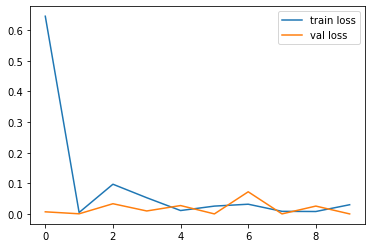

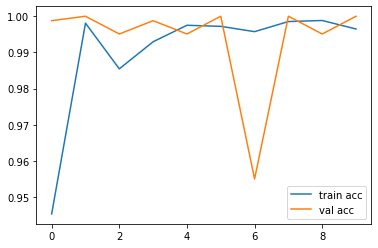

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [ ]:

y_pred = model.predict(test_set)


In [ ]:
y_pred

array([[1.0000000e+00, 2.2542253e-20, 2.2843137e-14, 2.0930392e-37],
       [1.0000000e+00, 0.0000000e+00, 6.3773278e-22, 9.4818261e-25],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       ...,
       [0.0000000e+00, 9.0824435e-25, 1.2668066e-31, 1.0000000e+00],
       [1.0000000e+00, 1.7591634e-15, 1.3245913e-17, 6.1878869e-30],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00]],
      dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 0, 3, ..., 3, 0, 1])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('/content/model_inception.h5')

In [ ]:
# Load the weights fromt the fine-tuned model
#model=load_model('/content/drive/MyDrive/Air_Pollution_Dataset/Model/model_inception.h5')

In [ ]:
from keras.preprocessing.image import img_to_array,load_img
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
def pred(img_path):    
    img = load_img(img_path,target_size = (224,224)) #Load the image and set the target size to the size of input of our model
    x = img_to_array(img) #Convert the image to array
    x = np.expand_dims(x,axis=0) #Convert the array to the form (1,x,y,z) 
    x = preprocess_input(x) # Use the preprocess input function o subtract the mean of all the images
    p = np.argmax(model.predict(x)) # Store the argmax of the predictions
    if p==0:     # P=0 for basal,P=1 for melanoma , P=2 for squamous
        print("Sorry!! You've enetered Irrelevent Data")
    elif p==1:
        print("Moderate Pollution")
    elif p==2:
        print("No Pollution")
    elif p==3:
        print("Severe Pollution")
    

In [ ]:
import cv2
import glob

Moderate Pollution


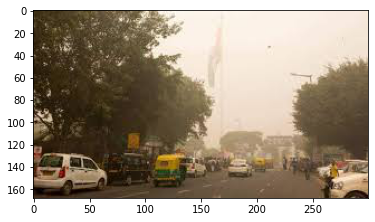

In [ ]:
pred('/content/drive/MyDrive/Air_Pollution_Dataset/Validate/Moderate Pollution/7.jpg')
z = plt.imread('/content/drive/MyDrive/Air_Pollution_Dataset/Validate/Moderate Pollution/7.jpg')
plt.imshow(z);

Severe Pollution


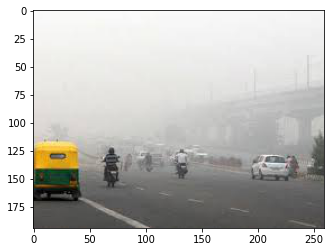

In [ ]:
pred('/content/drive/MyDrive/Air_Pollution_Dataset/Validate/Severe Pollution/12.jpg')
z = plt.imread('/content/drive/MyDrive/Air_Pollution_Dataset/Validate/Severe Pollution/12.jpg')
plt.imshow(z);

No Pollution


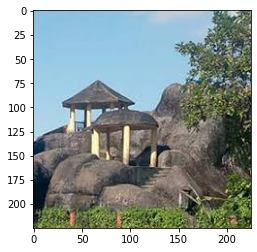

In [ ]:
pred('/content/drive/MyDrive/Air_Pollution_Dataset/Validate/No Pollution/71.jpg')
z = plt.imread('/content/drive/MyDrive/Air_Pollution_Dataset/Validate/No Pollution/71.jpg')
plt.imshow(z);

Sorry!! You've enetered Irrelevent Data


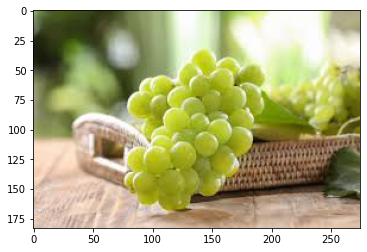

In [ ]:
pred('/content/drive/MyDrive/Air_Pollution_Dataset/Validate/Irrelevant data/21.jpg')
z = plt.imread('/content/drive/MyDrive/Air_Pollution_Dataset/Validate/Irrelevant data/21.jpg')
plt.imshow(z);

Sorry!! You've enetered Irrelevent Data


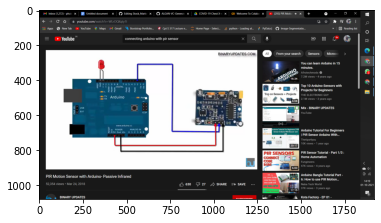

In [ ]:
pred('/content/2021-10-01.png')
z = plt.imread('/content/2021-10-01.png')
plt.imshow(z);